In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from keras.layers import Input,Dense
from keras.models import Model

Using TensorFlow backend.


<h3> Vanilla Autoencoder </h3>

In [4]:
#size of encoding representation dimension
encoding_dim= 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,)) #placeholder

encoded = Dense(encoding_dim, activation='relu')(input_img) #input encoded respresentation from 784 to 32 dimension
decoded = Dense(784,activation='sigmoid')(encoded) #lossy resconstruction from 32 back to 784

autoencoder = Model(input_img,decoded) #maps input to its reconstruction


<h3> Create encoder model </h3>

In [5]:
encoder = Model(input_img,encoded)

<h3> Create decoder model </h3>

In [6]:
encoded_input = Input(shape=(encoding_dim,)) #placeholder for encoded 32 dim input
decoder_layer = autoencoder.layers[-1] #retreive last layer of autoencoder model , -1 as last layer

decoder = Model(encoded_input,decoder_layer(encoded_input))  #decoder model, also we can use decoder = Model(encoded_input,decoded) 

In [7]:
#compile autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

<h3> Prepare input data </h3>

In [8]:
#MNIST dataset

from keras.datasets import mnist
(x_train,_),(x_test,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
#Normalization between 0,1

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


<h3> Train autoencoder </h3>

In [12]:
autoencoder.fit(x_train,x_train,
               epochs = 50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1046 - val_loss: 0.1028
Epoch 2/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1043 - val_loss: 0.1025
Epoch 3/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1040 - val_loss: 0.1023
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1038 - val_loss: 0.1020
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1036 - val_loss: 0.1018
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1033 - val_loss: 0.1016
Epoch 7/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1031 - val_loss: 0.1014
Epoch 8/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1029 - val_loss: 0.1012
Epoch 9/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.1028 - val_loss: 0.1011
Epoch

In [13]:
#encode and decode some digits

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

<h3> Display Results </h3>

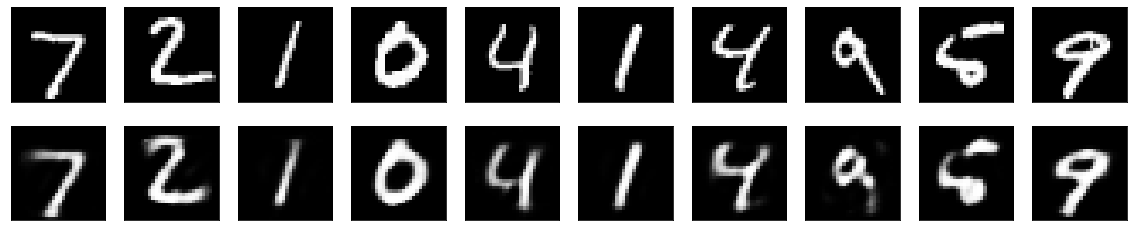

In [15]:

n=10 #how mnay digits we want to display
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #to display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

<h2> Sparse Autoencoder </h2>

<h5> Adding a sparsity constraint to encoded respresentations </h5>

In [16]:
from keras import regularizers

encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim,activation='relu',
               activity_regularizer=regularizers.l1(10e-5))(input_img) ## add a Dense layer with a L1 activity regularizer
decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded) #creating autoencoder model
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy') #compile

autoencoder.fit(x_train,x_train,
               epochs=100,batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.6730 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4531 - val_loss: 0.4

In [17]:
#encode and decode some digits

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

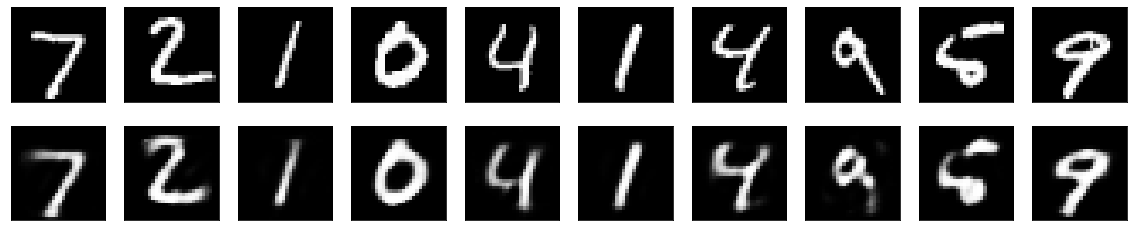

In [18]:
n=10 #how mnay digits we want to display
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #to display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()